# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

##### 1)

Carregando Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
#Lendo base de dados
df = pd.read_csv('demo02.csv')

In [3]:
# Visualizando base de dados
df

,posse_de_veiculo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,0,58.832877,3.106849,1,0,0,0,2.0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,52.356164,8.358904,1,0,1,1,1.0,0,...,True,False,False,True,False,True,False,False,False,False
2,1,0,46.224658,2.106849,1,1,1,1,2.0,0,...,False,True,False,False,False,True,False,False,False,False
3,1,0,29.230137,3.021918,1,0,0,0,2.0,0,...,False,True,False,False,False,True,False,False,False,False
4,0,0,27.482192,4.024658,1,0,1,0,2.0,0,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,1,34.857534,3.101370,1,1,1,0,1.0,1,...,True,False,False,True,False,True,False,False,False,False
6766,0,0,54.109589,9.884932,1,0,0,0,2.0,1,...,True,False,False,False,False,True,False,False,False,False
6767,0,0,43.389041,7.380822,1,1,1,0,2.0,1,...,True,True,False,False,False,True,False,False,False,False
6768,1,0,30.005479,9.800000,1,1,0,0,2.0,1,...,True,True,False,False,False,True,False,False,False,False


In [4]:
X = df.drop('mau', axis=1)
y = df['mau']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [6]:
print('Shape do conjunto de treinamento:', X_train.shape, y_train.shape)
print('Shape do conjunto de teste:', X_test.shape, y_test.shape)

Shape do conjunto de treinamento: (4739, 28) (4739,)
Shape do conjunto de teste: (2031, 28) (2031,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

##### Resolucão dos exercícios da atividade 1:

###### 2.1)

In [8]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [11]:
# Visualização da base de treinamento
X

,posse_de_veiculo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,0,58.832877,3.106849,1,0,0,0,2.0,True,...,True,True,False,False,False,True,False,False,False,False
1,0,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,1,0,46.224658,2.106849,1,1,1,1,2.0,True,...,False,True,False,False,False,True,False,False,False,False
3,1,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,0,0,27.482192,4.024658,1,0,1,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,1,34.857534,3.101370,1,1,1,0,1.0,False,...,True,False,False,True,False,True,False,False,False,False
6766,0,0,54.109589,9.884932,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False
6767,0,0,43.389041,7.380822,1,1,1,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
6768,1,0,30.005479,9.800000,1,1,0,0,2.0,True,...,True,True,False,False,False,True,False,False,False,False


###### 2.2)

In [17]:
clf = clf.fit(X_train,y_train)

###### 2.3)

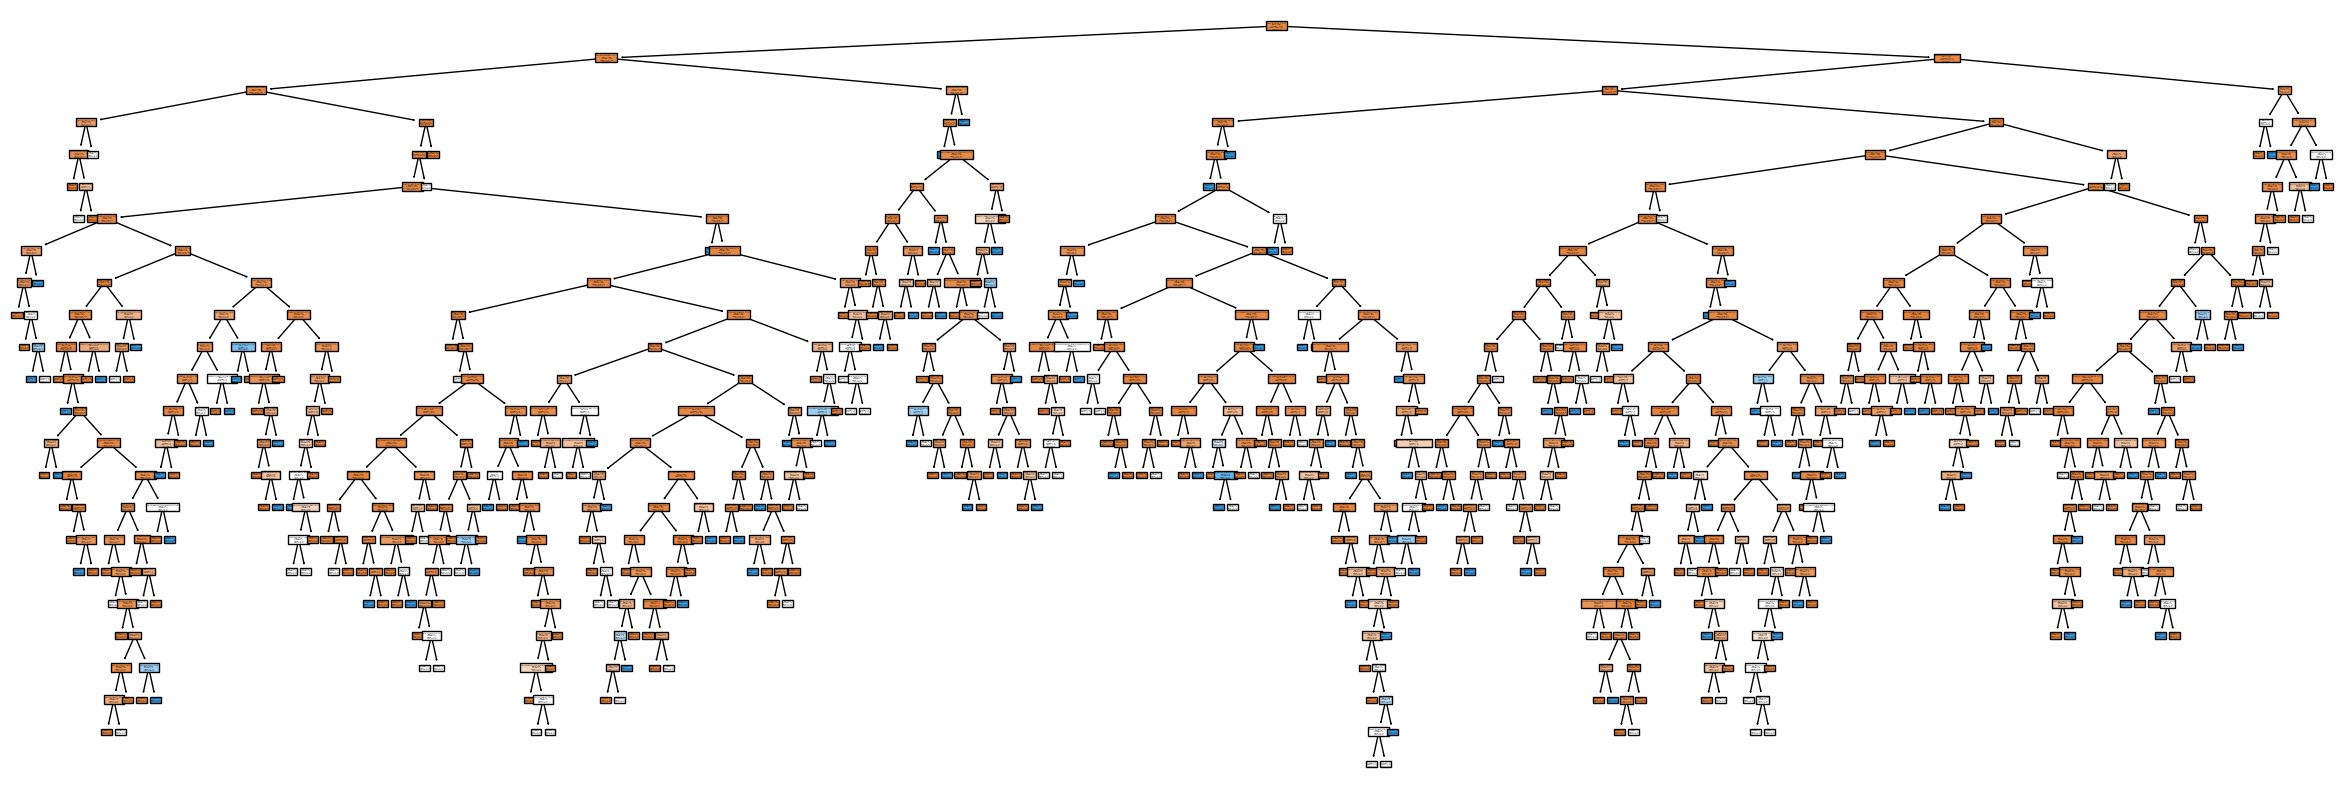

In [35]:
plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, class_names=['Bons', 'Maus'],
         feature_names=list(X.columns));

###### 2.4)

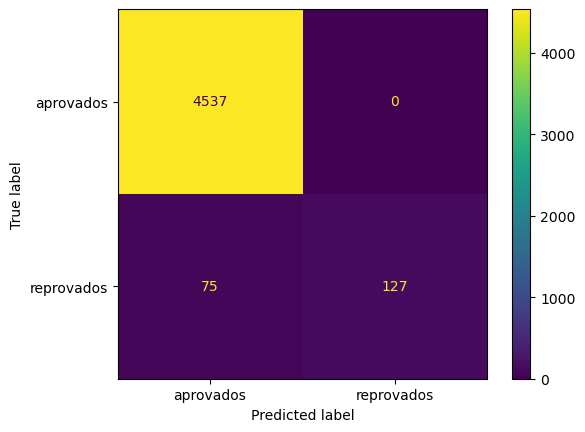

In [38]:
# Classificação da base de treinamentos
y_train_pred = clf.predict(X_train)

# Matriz de confusão com dados de treinamento
cm_train = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

###### 2.5)

In [39]:
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Acurácia: {accuracy_train*100:.4n}%")

Acurácia: 98.42%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

##### Resolução das exercícios da atividade 2:

###### 3.1)

In [65]:
preditos_test = clf.predict(X_test)

###### 3.2)

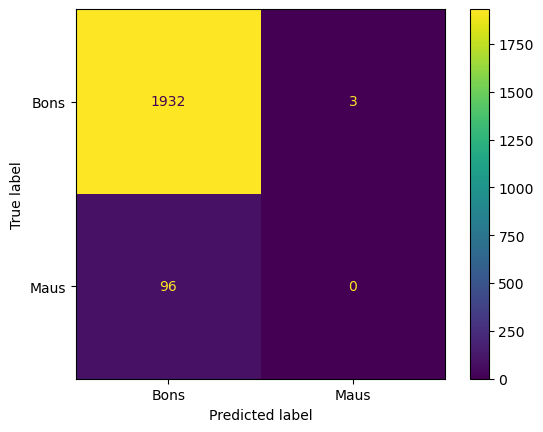

In [66]:
cm_test = confusion_matrix(y_test, preditos_test, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Bons', 'Maus'])

MatrizDeConfusao.plot()

###### 3.3)

In [52]:
accuracy_test = accuracy_score(y_test, preditos_test)
print(f"Acurácia teste: {accuracy_test*100:.4n}%")
print(f"Acurácia trainamento: {accuracy_train*100:.4n}%")

Acurácia teste: 91.93%
Acurácia trainamento: 98.42%


###### 3.4)

In [62]:
clf  = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [63]:
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9512555391432792

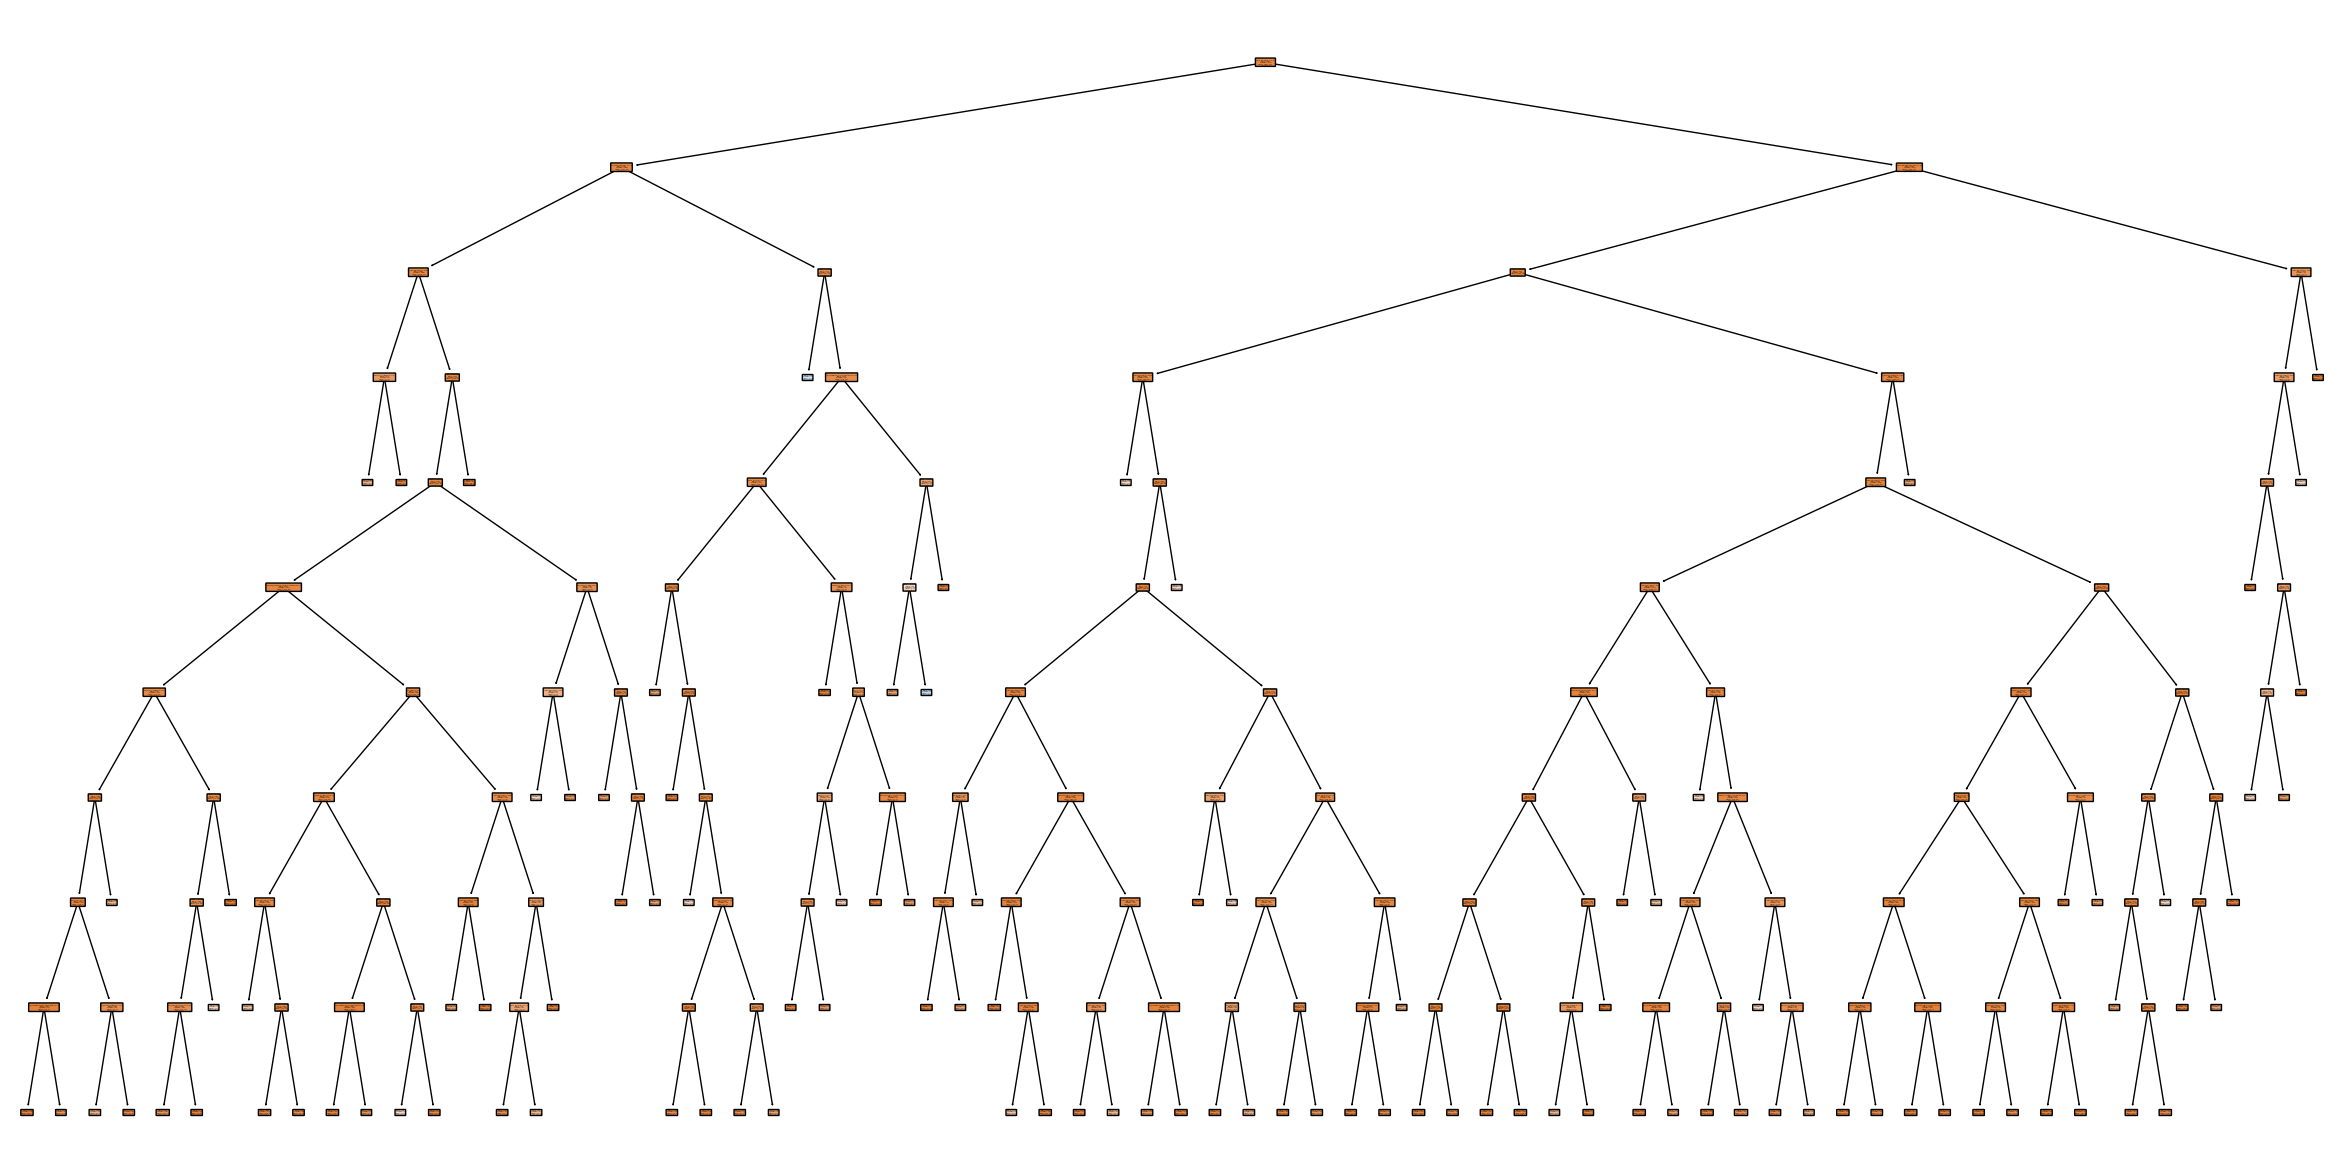

In [67]:
plt.figure(figsize=[30,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Bons', 'Maus'],
         feature_names=list(X_train.columns));

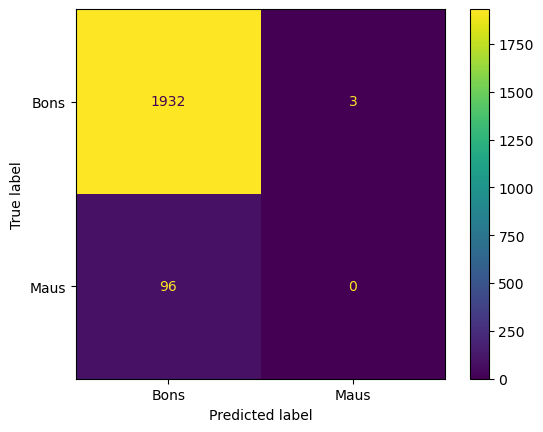

In [68]:
cm_ = confusion_matrix(y_test, predict, labels=clf.classes_)
MatrizDeConfusao2 = ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=['Bons', 'Maus'])

MatrizDeConfusao2.plot()

In [73]:
total_proponentes = X_test.shape[0]

In [85]:
# Calculando as proporções
proporcao_mau = (cm_[0, 1]) / total_proponentes

print(f"Proporção de proponentes classificados como 'mau': {proporcao_mau*100:.4n}%")

Proporção de proponentes classificados como 'mau': 0.1477%


###### 3.5)

In [77]:
# Proporção de acurácia se o modelo classificar todos como 'bons'
(1932+3)/total_proponentes

0.9527326440177253

A Diferença seria mínima pois são aproximadamente 95,27% contra aproximados os 95,12% da acurácia normal obtida no modelo.